## 🔍 Understanding Outliers
   Outliers are data points that differ significantly from other observations. They can arise from errors in data entry, measurement variations, or other factors.

2. **🛠️ Techniques for Outlier Detection**  
   a. **📊 Visual Methods**  
      - **Box Plot:** A box plot helps to visualize the distribution of data and identify potential outliers. Outliers are typically points that fall outside 1.5 times the interquartile range (IQR) above the third quartile or below the first quartile.

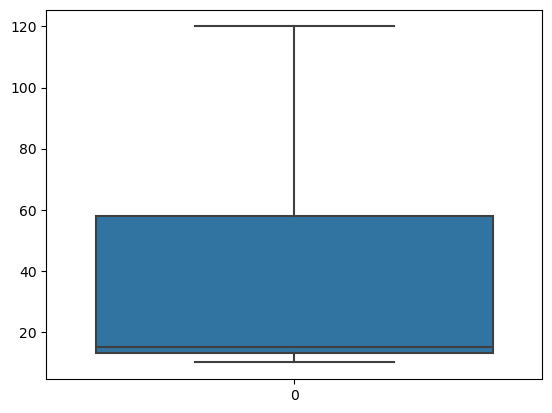

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example data
data = [10, 12, 14, 15, 16, 100, 120]  # Sample data with outliers

sns.boxplot(data)
plt.show()

- **Scatter Plot:** Useful for visualizing the relationship between two variables and spotting anomalies.

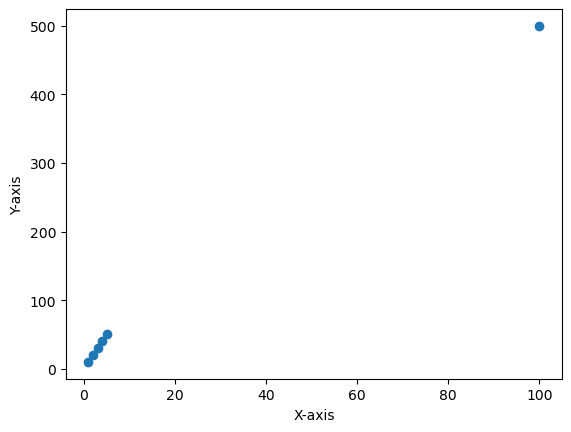

In [2]:
import numpy as np

x = np.array([1, 2, 3, 4, 5, 100])
y = np.array([10, 20, 30, 40, 50, 500])

plt.scatter(x, y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

b. **📏 Statistical Methods**  
- **Z-Score:** Measures how many standard deviations a data point is from the mean. A common threshold is 3.0; points with a z-score greater than this are considered outliers.

In [11]:
from scipy import stats
import numpy as np

data = np.array([10, 12, 14, 15, 16, 1000])
z_scores = np.abs(stats.zscore(data)) # Z
print(z_scores)

[0.45645414 0.45101476 0.44557539 0.4428557  0.44013601 2.236036  ]


- The Z-score is a statistical measure that describes how many standard deviations a data point is from the mean of the dataset. It’s useful for identifying how unusual or extreme a particular value is in the context of a distribution.
- 1.34081016 , 1.79532207 mean data points are too far they must exist after 3.0 Standard deviation

- **IQR Method:** Uses the Interquartile Range (IQR) to define the range within which most of the data lies. Points outside 1.5 * IQR above the third quartile or below the first quartile are considered outliers.

In [12]:
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = [x for x in data if x < lower_bound or x > upper_bound]
print(outliers)

[1000]


1. **🗑️ Removing Outliers**  
   Once you’ve identified outliers using the techniques above, you can remove them by filtering the dataset.

### IQR Method of Outlier Removal 📉

The **Interquartile Range (IQR)** method is used to detect and remove outliers from data. It works by measuring the spread of the middle 50% of the data, which is the range between the first quartile (Q1) and the third quartile (Q3). Outliers are values that fall significantly below Q1 or above Q3.

#### How It Works:
1. **Calculate Q1 and Q3:** Find the 25th percentile (Q1) and the 75th percentile (Q3) of your dataset.
2. **Compute IQR:** Subtract Q1 from Q3 (IQR = Q3 - Q1).
3. **Determine Outlier Boundaries:** 
   - **Lower Bound:** Q1 - 1.5 * IQR
   - **Upper Bound:** Q3 + 1.5 * IQR
4. **Identify Outliers:** Values outside these boundaries are considered outliers and can be removed from the dataset.

In [15]:
data = np.array([10, 12, 14, 15, 16, 1000])

# Example using IQR method
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cleaned_data = [x for x in data if x >= lower_bound and x <= upper_bound]
print(cleaned_data)

[10, 12, 14, 15, 16]


### Z-Score Method of Outlier Removal 📊

The **Z-Score** method identifies outliers by measuring how many standard deviations a data point is from the mean of the dataset. A Z-score indicates how far a particular value is from the average.

#### How It Works:
- **Calculate the Mean (μ):** Find the average of your dataset.
- **Calculate the Standard Deviation (σ):** Measure the spread of the data points around the mean.
- **Compute Z-Scores:** For each data point, calculate the Z-score using the formula:
    - `Z = (X - mean) / sigma` (where `X` is the data point)

- **Determine Outlier Threshold:** Typically, a Z-score beyond ±2 or ±3 is considered an outlier, depending on the desired sensitivity.

In [34]:
import numpy as np

def z_score_outliers(data, threshold=3):
    """
    Identify outliers in a dataset using the Z-score method.

    Parameters:
    data (list or numpy array): The dataset to analyze.
    threshold (float): The Z-score threshold to classify outliers.

    Returns:
    outliers (list): A list of outlier values.
    """
    # Convert data to a numpy array if it's not already
    data = np.array(data)

    # Calculate mean and standard deviation
    mean = np.mean(data)
    std_dev = np.std(data)

    # Calculate Z-scores for each data point
    z_scores = (data - mean) / std_dev

    # Identify outliers
    outliers = data[np.abs(z_scores) > threshold]

    return outliers

# Example usage
data = [50, 55, 56, 60, 62, 65, 100]
outliers = z_score_outliers(data)

print("Outliers:", outliers)

Outliers: []
